In [3]:
#used paytm.com/flights to extract the data. Oneway travel within between Delhi to different states in India.

#data is for particular day of 16th may 2022.
#departure city is from Delhi 
#number of passengers 1 
#ticket type Economy


In [2]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import missingno
import pandas_profiling
from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [4]:
df = pd.read_csv("myDataFrame.csv")
df

,Unnamed: 0,name,departue_time,arrival_time,departure_city,arrival_city,journey_time,number_of_stops,price
0,0,Air Asia,13:00,14:50,Delhi,Mumbai,1h 50m,Non Stop,"4,799"
1,1,IndiGo,11:55,13:55,Delhi,Mumbai,2h,Non Stop,"4,799"
2,2,IndiGo,10:45,12:50,Delhi,Mumbai,2h 5m,Non Stop,"4,799"
3,3,IndiGo,06:30,08:35,Delhi,Mumbai,2h 5m,Non Stop,"4,799"
4,4,IndiGo,23:35,01:40,Delhi,Mumbai,2h 5m,Non Stop,"4,799"
...,...,...,...,...,...,...,...,...,...
1551,72,Air India,21:15,14:25,Delhi,BBI,17h 10m,2,"14,253"
1552,73,Air India,21:15,14:25,Delhi,BBI,17h 10m,2,"14,253"
1553,74,Air India,06:10,14:25,Delhi,BBI,32h 15m,2,"14,253"
1554,75,Air India,06:10,14:25,Delhi,BBI,32h 15m,2,"14,253"


# Data Preprocessing

In [10]:
#departue_time (converted the departure time)

df["Dep_Hour"] = pd.to_datetime(df.departue_time, format="%H:%M").dt.hour
df["Dep_Min"] = pd.to_datetime(df.departue_time, format="%H:%M").dt.minute
df["departure_time"] = df['Dep_Hour'] + df['Dep_Min'] / 60

#arrival_time (converted the arrival time)

df["Arr_Hour"] = pd.to_datetime(df.arrival_time, format="%H:%M").dt.hour
df["Arr_Min"] = pd.to_datetime(df.arrival_time, format="%H:%M").dt.minute
df["arrival_time"] = df['Arr_Hour'] + df['Arr_Min'] / 60

#journey_time (replaced the journey time)

df['journey_time'] = df['journey_time'].str.replace('h ','.')
df['journey_time'] = df['journey_time'].str.replace('m','')
df['journey_time'] = df['journey_time'].str.replace('h','')
df['journey_time'] = df['journey_time'].astype('float')

#Price (#removed the "," in price column)

df['price'] = df['price'].str.replace(',','')
df['price'] = df['price'].astype('float')

#Number of Stops (Replaced the Non-Stop to "0" for uniform since while scrapping itself limited the data to 1 stop or 2 stops in numbers)

df.number_of_stops.replace({"Non Stop": 0}, inplace = True)
df['number_of_stops'] = df['number_of_stops'].astype('float')

df

,Unnamed: 0,name,departue_time,arrival_time,departure_city,arrival_city,journey_time,number_of_stops,price,Dep_Hour,Dep_Min,departure_time,Arr_Hour,Arr_Min
0,0,Air Asia,13:00,14.833333,Delhi,Mumbai,1.50,0.0,4799.0,13,0,13.000000,14,50
1,1,IndiGo,11:55,13.916667,Delhi,Mumbai,2.00,0.0,4799.0,11,55,11.916667,13,55
2,2,IndiGo,10:45,12.833333,Delhi,Mumbai,2.50,0.0,4799.0,10,45,10.750000,12,50
3,3,IndiGo,06:30,8.583333,Delhi,Mumbai,2.50,0.0,4799.0,6,30,6.500000,8,35
4,4,IndiGo,23:35,1.666667,Delhi,Mumbai,2.50,0.0,4799.0,23,35,23.583333,1,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,72,Air India,21:15,14.416667,Delhi,BBI,17.10,2.0,14253.0,21,15,21.250000,14,25
1552,73,Air India,21:15,14.416667,Delhi,BBI,17.10,2.0,14253.0,21,15,21.250000,14,25
1553,74,Air India,06:10,14.416667,Delhi,BBI,32.15,2.0,14253.0,6,10,6.166667,14,25
1554,75,Air India,06:10,14.416667,Delhi,BBI,32.15,2.0,14253.0,6,10,6.166667,14,25


In [12]:
df.drop('Unnamed: 0', axis=1, inplace=True) (#Unncessary columns since it is a Serial number column)
df.drop(columns = ['Dep_Hour','Dep_Min'], inplace=True) (#columns not required after conversion)
df.drop(columns = ['Arr_Hour','Arr_Min'], inplace=True) (#columns not required after conversion)

In [14]:
df.drop('departue_time', axis=1, inplace=True) #since already replaced dropping the main column.

In [15]:
df

,name,arrival_time,departure_city,arrival_city,journey_time,number_of_stops,price,departure_time
0,Air Asia,14.833333,Delhi,Mumbai,1.50,0.0,4799.0,13.000000
1,IndiGo,13.916667,Delhi,Mumbai,2.00,0.0,4799.0,11.916667
2,IndiGo,12.833333,Delhi,Mumbai,2.50,0.0,4799.0,10.750000
3,IndiGo,8.583333,Delhi,Mumbai,2.50,0.0,4799.0,6.500000
4,IndiGo,1.666667,Delhi,Mumbai,2.50,0.0,4799.0,23.583333
...,...,...,...,...,...,...,...,...
1551,Air India,14.416667,Delhi,BBI,17.10,2.0,14253.0,21.250000
1552,Air India,14.416667,Delhi,BBI,17.10,2.0,14253.0,21.250000
1553,Air India,14.416667,Delhi,BBI,32.15,2.0,14253.0,6.166667
1554,Air India,14.416667,Delhi,BBI,32.15,2.0,14253.0,6.166667


# Exploratory Data Analysis (EDA)

In [16]:
print("We have {} Rows and {} Columns in our dataframe".format(df.shape[0], df.shape[1]))
df.head(10)

We have 1556 Rows and 8 Columns in our dataframe


,name,arrival_time,departure_city,arrival_city,journey_time,number_of_stops,price,departure_time
0,Air Asia,14.833333,Delhi,Mumbai,1.5,0.0,4799.0,13.000000
1,IndiGo,13.916667,Delhi,Mumbai,2.0,0.0,4799.0,11.916667
2,IndiGo,12.833333,Delhi,Mumbai,2.5,0.0,4799.0,10.750000
3,IndiGo,8.583333,Delhi,Mumbai,2.5,0.0,4799.0,6.500000
4,IndiGo,1.666667,Delhi,Mumbai,2.5,0.0,4799.0,23.583333
5,IndiGo,19.083333,Delhi,Mumbai,2.5,0.0,4799.0,17.000000
6,IndiGo,9.416667,Delhi,Mumbai,2.5,0.0,4799.0,7.333333
7,IndiGo,4.166667,Delhi,Mumbai,2.1,0.0,4799.0,2.000000
8,Air Asia,6.583333,Delhi,Mumbai,2.1,0.0,4799.0,4.416667
9,IndiGo,7.666667,Delhi,Mumbai,2.1,0.0,4799.0,5.500000


In [17]:
#Column Description:

#name: This shows the list of all the Airline Names for which the data got scraped
#Departue Time: In this column we have the timings of every flight departure
#Arrival Time: Here in this column we have the timings of every flight arrival
#Journey Time: We can see the total duration of a flight that it took to fly from the source to the destination
#Departure City: Gives us the name of the source place where the flight journey began
#Arrival City: Shows us the name of the destination place where the flight journey ended
#Number of Stops: Lists the number of stops the flight is going to take to complete the entire journey
#Price: Finally we have our label column that has the ticket prices for the aircraft journey

In [18]:
df.isna().sum() # checking for missing values and it shows that there is no missing values.

name               0
arrival_time       0
departure_city     0
arrival_city       0
journey_time       0
number_of_stops    0
price              0
departure_time     0
dtype: int64

In [19]:
df.info()

#the below result shows that non null count and column data type details. we have all the 8 object datatype therefore we need to do some data cleaning is required.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1556 non-null   object 
 1   arrival_time     1556 non-null   float64
 2   departure_city   1556 non-null   object 
 3   arrival_city     1556 non-null   object 
 4   journey_time     1556 non-null   float64
 5   number_of_stops  1556 non-null   float64
 6   price            1556 non-null   float64
 7   departure_time   1556 non-null   float64
dtypes: float64(5), object(3)
memory usage: 97.4+ KB


In [20]:
df.nunique().sort_values().to_frame("Unique Values")

#checking for unique values in Dataset.

,Unique Values
departure_city,1
number_of_stops,4
name,6
arrival_city,16
departure_time,176
arrival_time,226
price,253
journey_time,273


In [21]:
value = ["number_of_stops", "name", "arrival_city"]
for col in value:
    print(col)
    print(df[col].value_counts())
    print("="*120)

#checking for the unique values in the columns number of stops, name and arraival city.

number_of_stops
1.0    1203
0.0     185
2.0     163
3.0       5
Name: number_of_stops, dtype: int64
name
IndiGo       614
Air India    274
Vistara      269
SpiceJet     139
Go First     131
Air Asia     129
Name: name, dtype: int64
arrival_city
Hyderabad     290
Goa           222
Mumbai        219
Chennai       195
Kochi         117
Coimbatore     95
VTZ            83
BBI            77
TRV            60
Patna          56
Port Blair     38
Vijayawada     37
Tirupati       26
Kannur         16
TRZ            14
Tuticorin      11
Name: arrival_city, dtype: int64


In [22]:
df.dtypes

#checking for the datatypes.

name                object
arrival_time       float64
departure_city      object
arrival_city        object
journey_time       float64
number_of_stops    float64
price              float64
departure_time     float64
dtype: object

In [23]:
df.describe(include="all").T

#checking for statistical data for the dataset.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,1556,6,IndiGo,614,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_time,1556.0,NaN,NaN,NaN,14.777046,5.740966,0.083333,10.166667,14.75,19.75,23.916667
departure_city,1556,1,Delhi,1556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_city,1556,16,Hyderabad,290,NaN,NaN,NaN,NaN,NaN,NaN,NaN
journey_time,1556.0,NaN,NaN,NaN,10.893188,6.703493,1.3,6.25,9.45,14.0,33.0
number_of_stops,1556.0,NaN,NaN,NaN,0.992288,0.486412,0.0,1.0,1.0,1.0,3.0
price,1556.0,NaN,NaN,NaN,8089.68509,2185.338067,4273.0,6742.0,7950.0,9104.0,19992.0
departure_time,1556.0,NaN,NaN,NaN,12.90617,5.784348,0.25,8.0,12.75,18.041667,23.583333


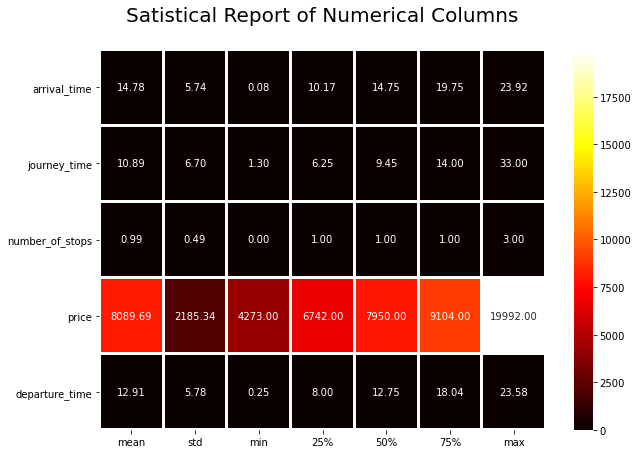

In [24]:
# Visualizing the statistical description of numeric datatype columns

plt.figure(figsize = (10,7))
sns.heatmap(round(df.describe()[1:].transpose(),2), linewidth = 2, annot= True, fmt = ".2f", cmap="hot")
plt.title("Satistical Report of Numerical Columns\n", fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

#visualizing the statistical data.

# Visualization

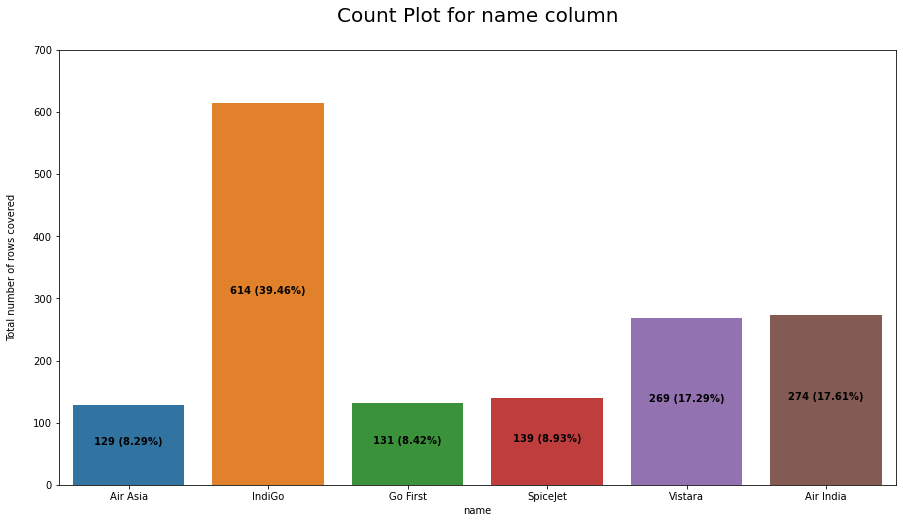

In [26]:
try:
    x = 'name'
    k=0
    plt.figure(figsize=[15,8])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,700)
    plt.title(f'Count Plot for {x} column\n', fontsize = 20)
    plt.ylabel(f'Total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass



In [ ]:
#Indigo leads the chart 614 flights to give a trip from Delhi to 16 different states in India on a particular date.
#followed by Air India & Vistara to give a trip from Delhi to 16 different states.


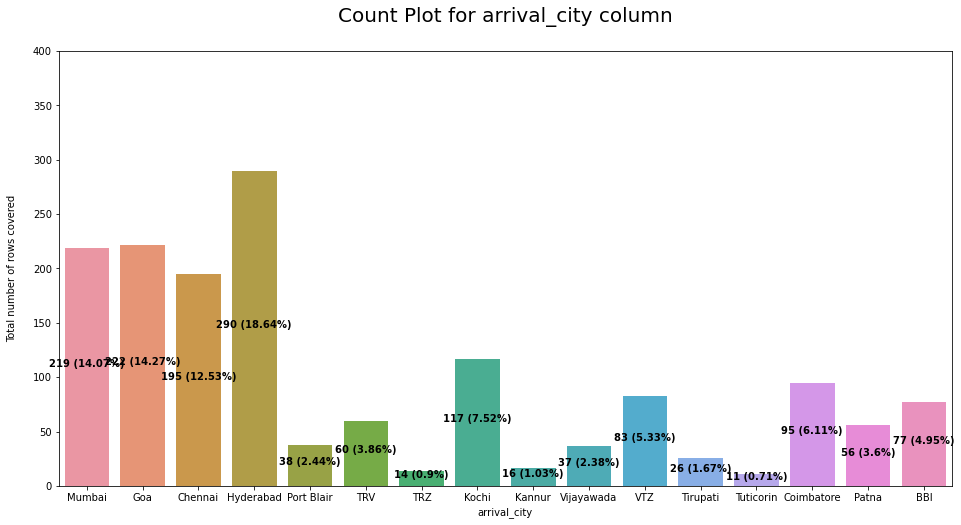

In [29]:
try:
    x = 'arrival_city'
    k=0
    plt.figure(figsize=[16,8])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,400)
    plt.title(f'Count Plot for {x} column\n', fontsize = 20)
    plt.ylabel(f'Total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

In [ ]:
#Delhi to Hyderabad have more flights compared to other cities ollowed by Goa and Mumbai for a particular date of 16th May 2022.

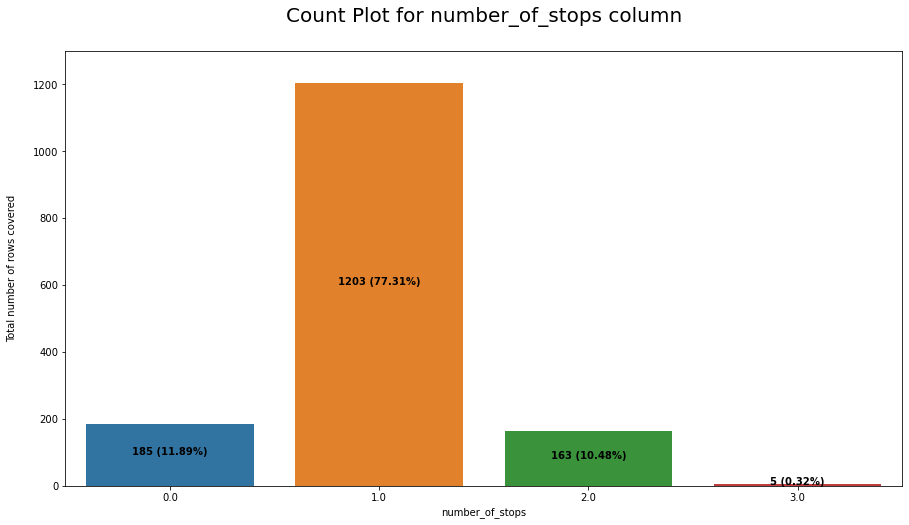

In [31]:
try:
    x = 'number_of_stops'
    k=0
    plt.figure(figsize=[15,8])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,1300)
    plt.title(f'Count Plot for {x} column\n', fontsize = 20)
    plt.ylabel(f'Total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

In [ ]:
#more number of flights with 1 stop followed by direct flights.

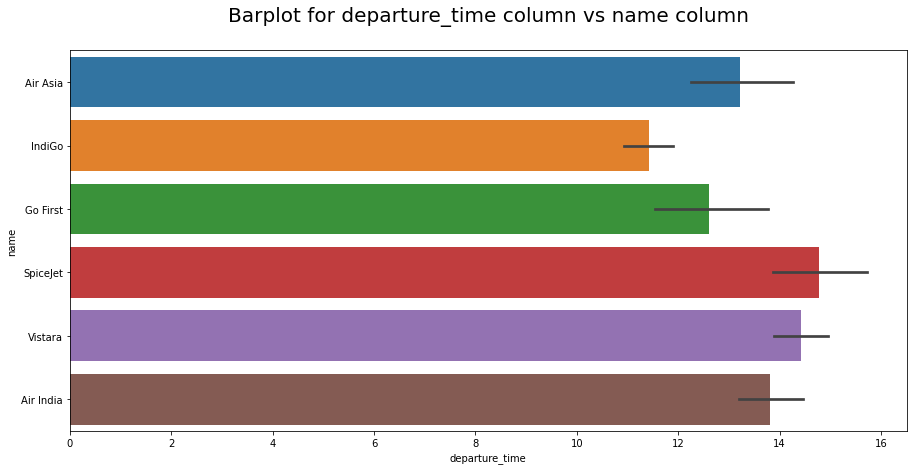

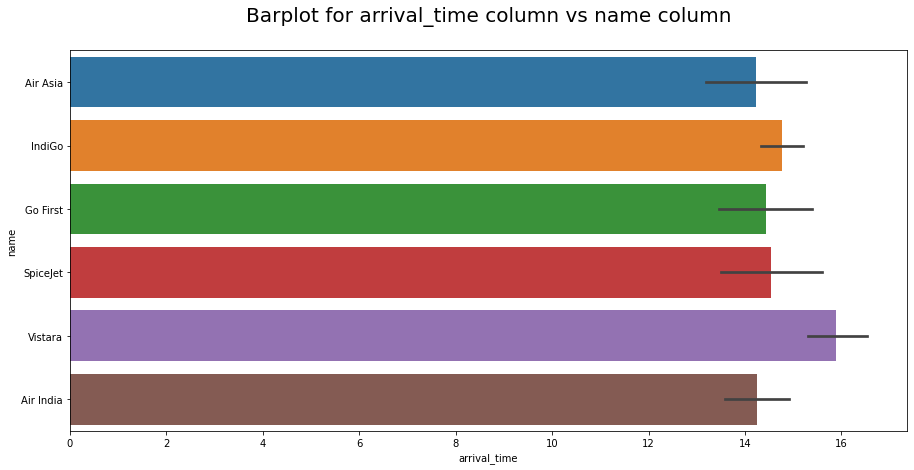

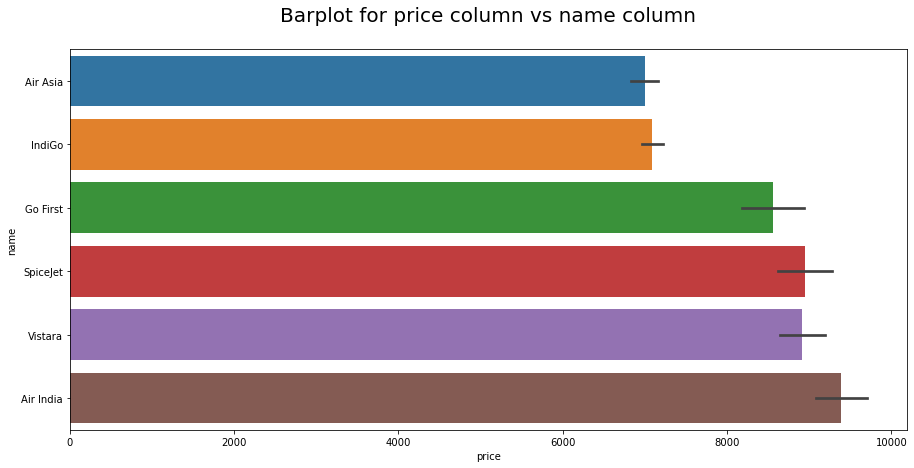

In [33]:
y = 'name'

x = 'departure_time'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column\n", fontsize = 20)
plt.show()

x = 'arrival_time'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column\n", fontsize = 20)
plt.show()

x = 'price'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column\n", fontsize = 20)
plt.show()

#Data compared with Airlines in Arrival Time, Departure Time and also Price.

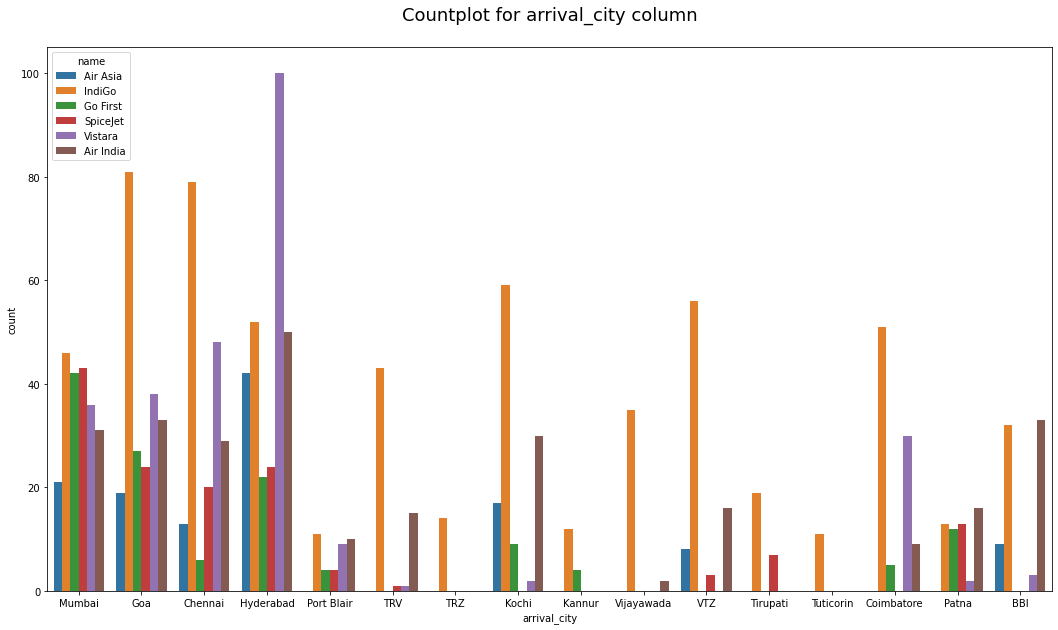

In [39]:
x = "arrival_city"
plt.figure(figsize=(18,10))
sns.countplot(x = x, hue = "name", data = df)
plt.title(f"Countplot for {x} column\n", fontsize = 18)
plt.show()

#data shows the destination cities where the service available with different airlines.

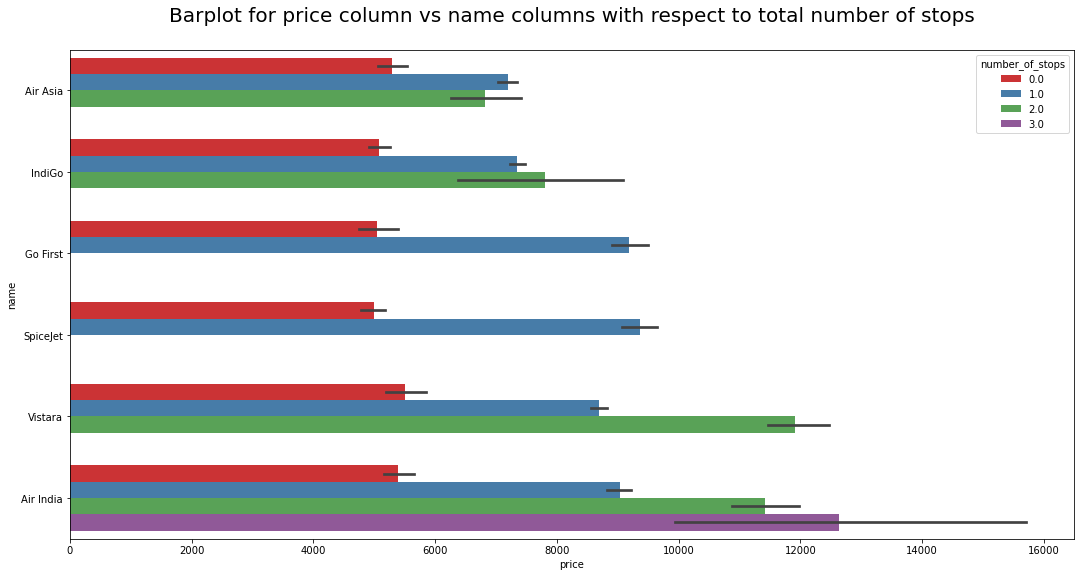

In [40]:
x = "price"
y = "name"

plt.figure(figsize=(18,9))
sns.barplot(x=df[x], y=df[y], hue=df['number_of_stops'], palette="Set1")
plt.title(f"Barplot for {x} column vs {y} columns with respect to total number of stops\n", fontsize = 20)
plt.show()


#price comparisson with different airlines with number of stops it has.

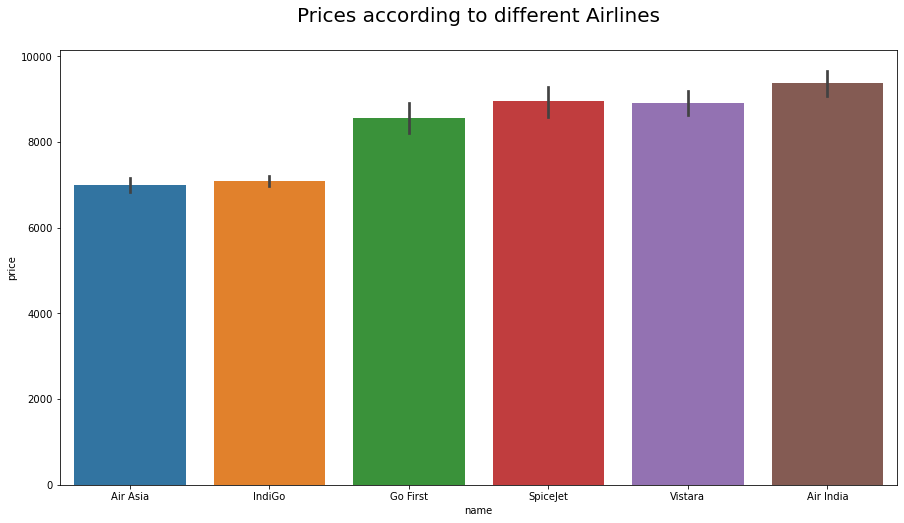

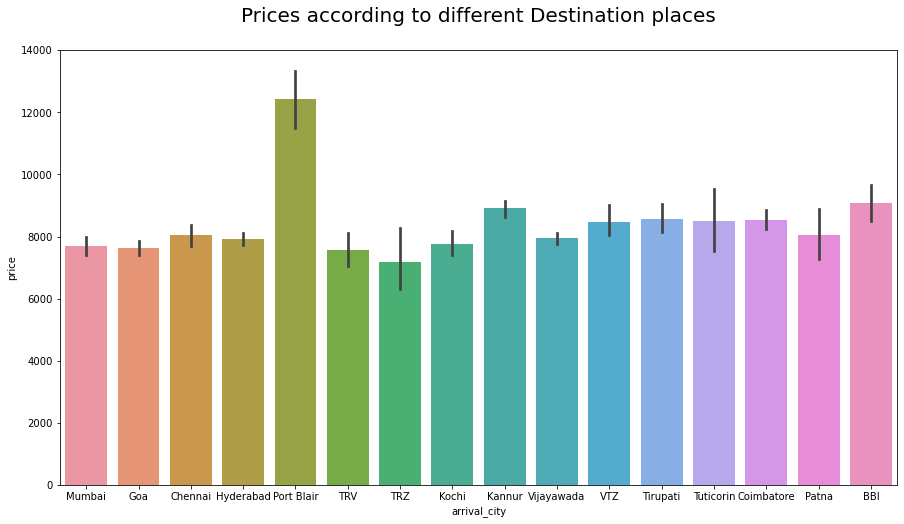

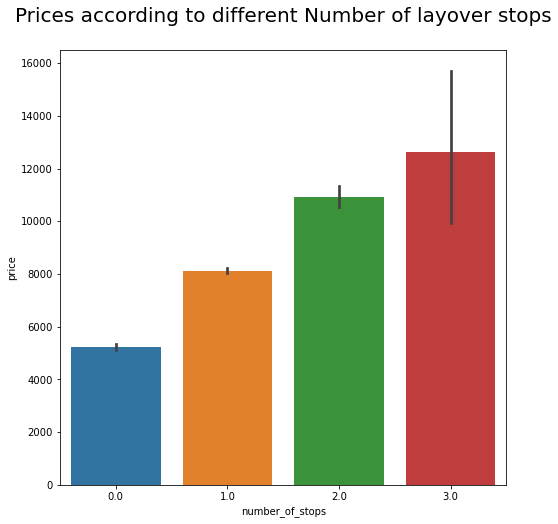

In [41]:
y = "price"

x = "name"
plt.figure(figsize = (15,8))
sns.barplot(data = df, y = y, x = x)
plt.title("Prices according to different Airlines\n", fontsize = 20)
plt.show()

x = "arrival_city"
plt.figure(figsize = (15,8))
sns.barplot(data = df, y = y, x = x)
plt.title("Prices according to different Destination places\n", fontsize = 20)
plt.show()

x = "number_of_stops"
plt.figure(figsize = (8,8))
sns.barplot(data = df, y = y, x = x)
plt.title("Prices according to different Number of layover stops\n", fontsize = 20)
plt.show()

#price comparisson between different city ad number of stops and airlines.

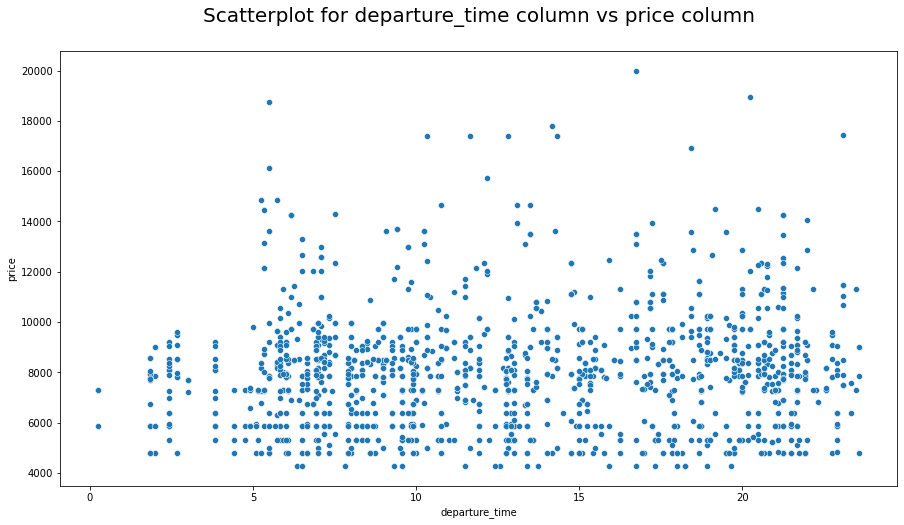

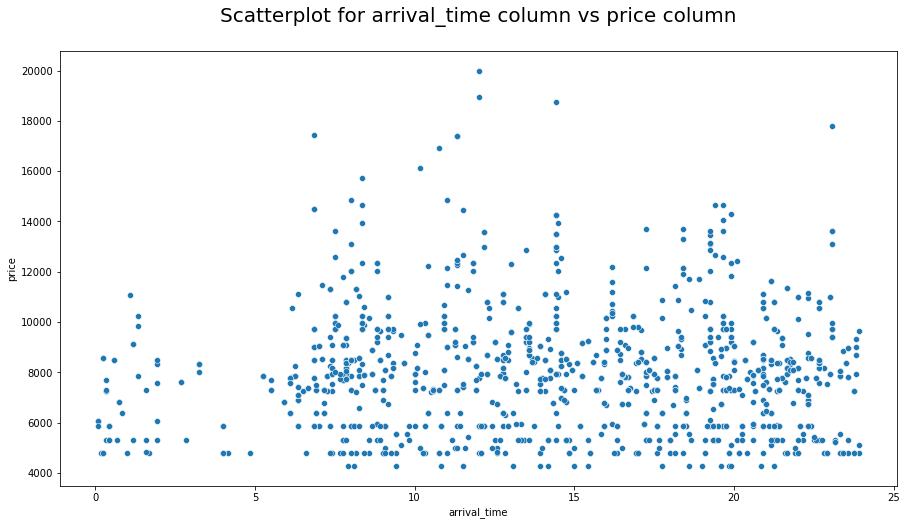

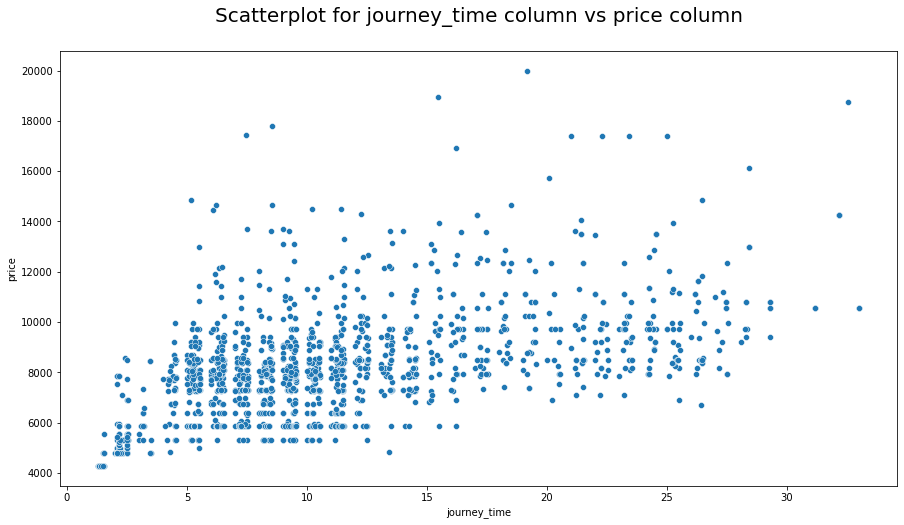

In [42]:
y = "price"

x = "departure_time"
plt.figure(figsize = (15,8))
sns.scatterplot(x=x,y=y,data=df)
plt.title(f"Scatterplot for {x} column vs {y} column\n", fontsize = 20)
plt.show()

x = "arrival_time"
plt.figure(figsize = (15,8))
sns.scatterplot(x=x,y=y,data=df)
plt.title(f"Scatterplot for {x} column vs {y} column\n", fontsize = 20)
plt.show()

x = "journey_time"
plt.figure(figsize = (15,8))
sns.scatterplot(x=x,y=y,data=df)
plt.title(f"Scatterplot for {x} column vs {y} column\n", fontsize = 20)
plt.show()

#Scatterplot for the comparisson between price vs arrival time & journey time as well as departure time.

# Encoding the categorical object datatype columns

In [43]:
# Ordinal Encoder

oe = OrdinalEncoder()
def ordinal_encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

column=["name", "arrival_city"]
df=ordinal_encode(df, column)
df

#encoding the categorical data for better build.

,name,arrival_time,departure_city,arrival_city,journey_time,number_of_stops,price,departure_time
0,0.0,14.833333,Delhi,7.0,1.50,0.0,4799.0,13.000000
1,3.0,13.916667,Delhi,7.0,2.00,0.0,4799.0,11.916667
2,3.0,12.833333,Delhi,7.0,2.50,0.0,4799.0,10.750000
3,3.0,8.583333,Delhi,7.0,2.50,0.0,4799.0,6.500000
4,3.0,1.666667,Delhi,7.0,2.50,0.0,4799.0,23.583333
...,...,...,...,...,...,...,...,...
1551,1.0,14.416667,Delhi,0.0,17.10,2.0,14253.0,21.250000
1552,1.0,14.416667,Delhi,0.0,17.10,2.0,14253.0,21.250000
1553,1.0,14.416667,Delhi,0.0,32.15,2.0,14253.0,6.166667
1554,1.0,14.416667,Delhi,0.0,32.15,2.0,14253.0,6.166667


In [44]:
# Ordinal Encoder

oe = OrdinalEncoder()
def ordinal_encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

column=["departure_city"]
df=ordinal_encode(df, column)
df

,name,arrival_time,departure_city,arrival_city,journey_time,number_of_stops,price,departure_time
0,0.0,14.833333,0.0,7.0,1.50,0.0,4799.0,13.000000
1,3.0,13.916667,0.0,7.0,2.00,0.0,4799.0,11.916667
2,3.0,12.833333,0.0,7.0,2.50,0.0,4799.0,10.750000
3,3.0,8.583333,0.0,7.0,2.50,0.0,4799.0,6.500000
4,3.0,1.666667,0.0,7.0,2.50,0.0,4799.0,23.583333
...,...,...,...,...,...,...,...,...
1551,1.0,14.416667,0.0,0.0,17.10,2.0,14253.0,21.250000
1552,1.0,14.416667,0.0,0.0,17.10,2.0,14253.0,21.250000
1553,1.0,14.416667,0.0,0.0,32.15,2.0,14253.0,6.166667
1554,1.0,14.416667,0.0,0.0,32.15,2.0,14253.0,6.166667


In [45]:
print("Shape of our data frame post encoding shows {} Rows and {} columns\n".format(df.shape[0], df.shape[1]))
df

Shape of our data frame post encoding shows 1556 Rows and 8 columns



,name,arrival_time,departure_city,arrival_city,journey_time,number_of_stops,price,departure_time
0,0.0,14.833333,0.0,7.0,1.50,0.0,4799.0,13.000000
1,3.0,13.916667,0.0,7.0,2.00,0.0,4799.0,11.916667
2,3.0,12.833333,0.0,7.0,2.50,0.0,4799.0,10.750000
3,3.0,8.583333,0.0,7.0,2.50,0.0,4799.0,6.500000
4,3.0,1.666667,0.0,7.0,2.50,0.0,4799.0,23.583333
...,...,...,...,...,...,...,...,...
1551,1.0,14.416667,0.0,0.0,17.10,2.0,14253.0,21.250000
1552,1.0,14.416667,0.0,0.0,17.10,2.0,14253.0,21.250000
1553,1.0,14.416667,0.0,0.0,32.15,2.0,14253.0,6.166667
1554,1.0,14.416667,0.0,0.0,32.15,2.0,14253.0,6.166667


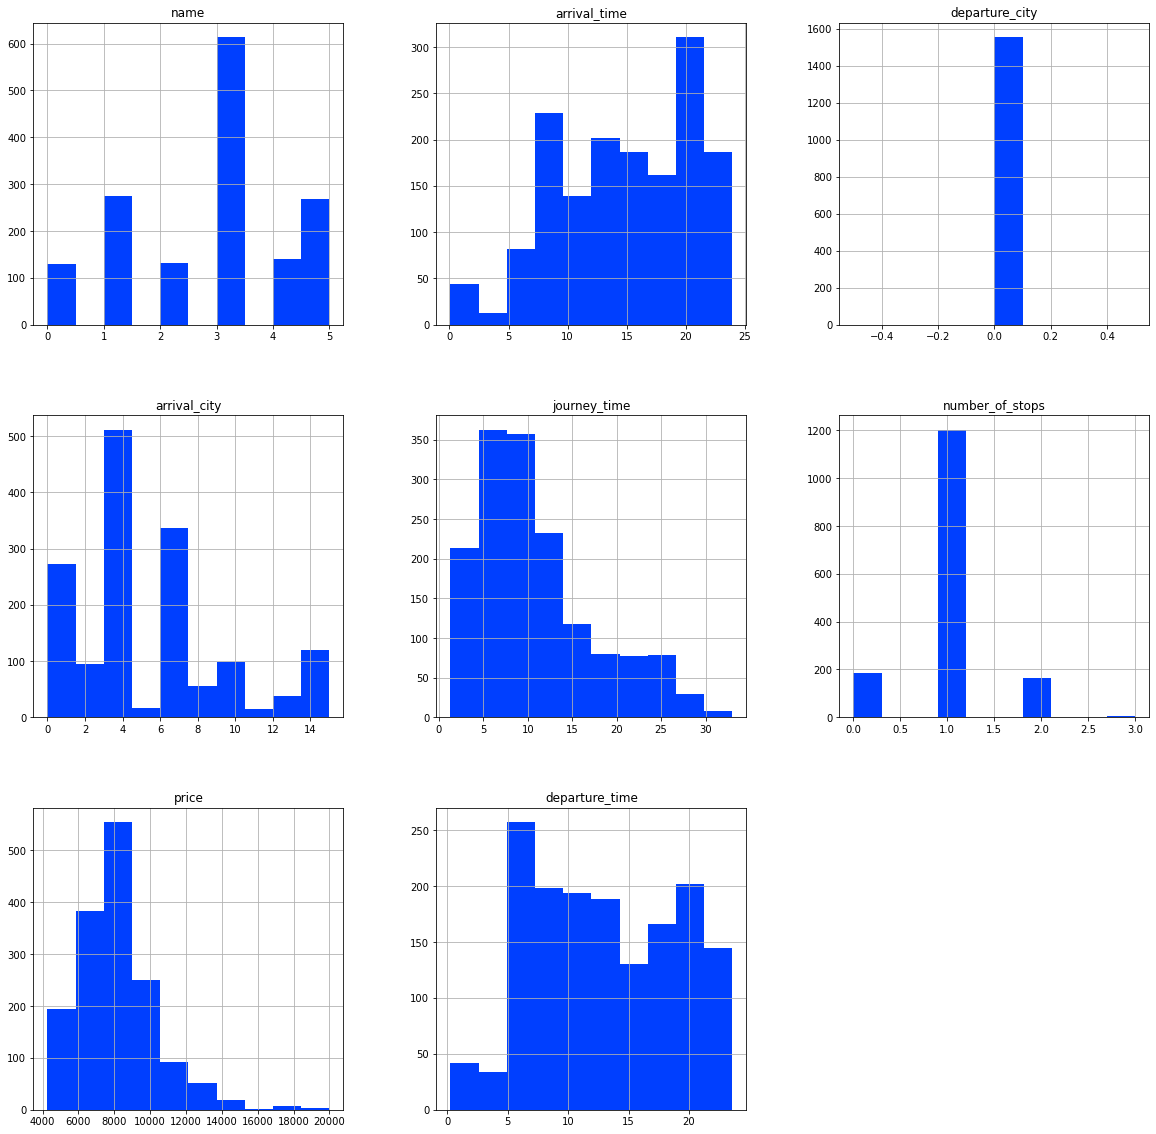

In [46]:
plt.style.use('seaborn-bright')

df.hist(figsize=(20,20))
plt.show()

# Correlation

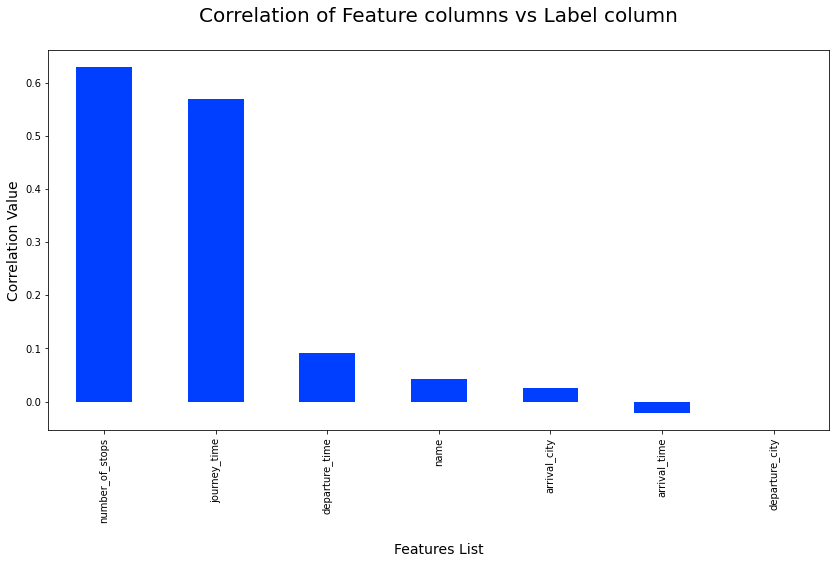

In [47]:
df_corr = df.corr()
plt.figure(figsize=(14,7))
df_corr['price'].sort_values(ascending=False).drop('price').plot.bar()
plt.title("Correlation of Feature columns vs Label column\n", fontsize=20)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=14)
plt.show()

# Outliers

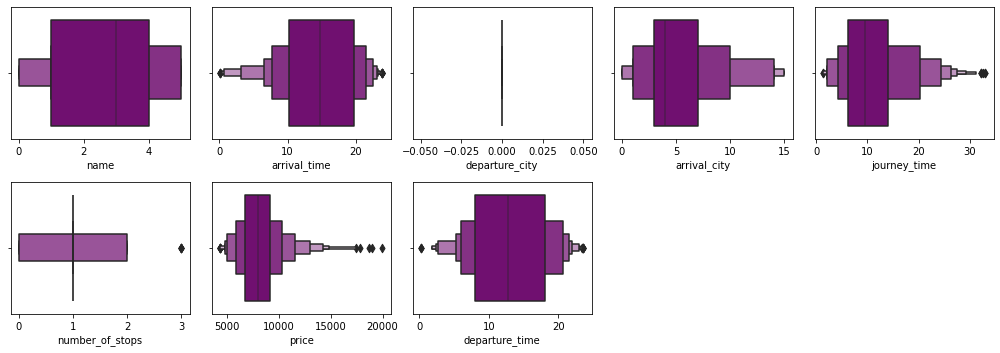

In [48]:
plt.figure(figsize=(14,7))
outl_df = df.columns.values
for i in range(0, len(outl_df)):
    plt.subplot(3, 5, i+1)
    ax = sns.boxenplot(df[outl_df[i]], color='purple')
    plt.tight_layout()
    
#checking for the outliers.

In [49]:
##skewness

In [50]:
df.skew()

#checking for the skewness in the data.


name              -0.163849
arrival_time      -0.374584
departure_city     0.000000
arrival_city       0.887593
journey_time       0.936018
number_of_stops    0.148344
price              1.046309
departure_time     0.077017
dtype: float64

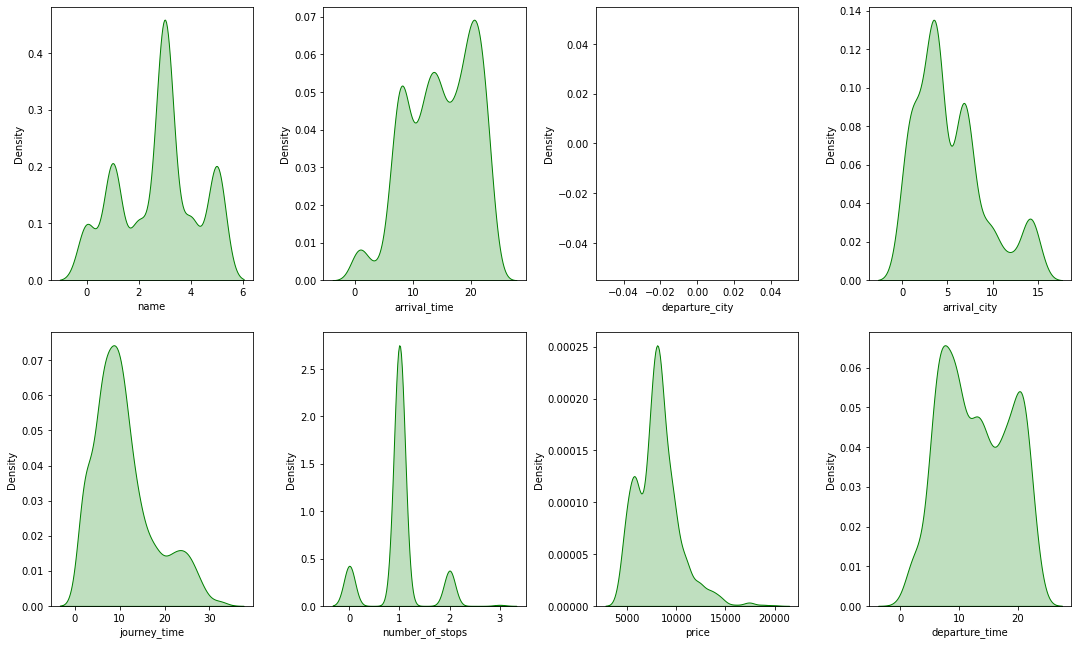

In [52]:
fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(15,9))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.8, w_pad=0.8, h_pad=2.0)
plt.show()

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [53]:
X = df.drop('price', axis=1)
Y = df['price']

# Finding the best random state for building Regression Models

In [54]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best R2 score is", maxAccu*100,"on Random State", maxRS)

Best R2 score is 56.65620517060137 on Random State 68


In [ ]:
#Best random number is 68.

# Feature importance bar graph

,Importance
Features,
journey_time,0.372
arrival_city,0.164
number_of_stops,0.154
name,0.135
departure_time,0.093
arrival_time,0.082
departure_city,0.000


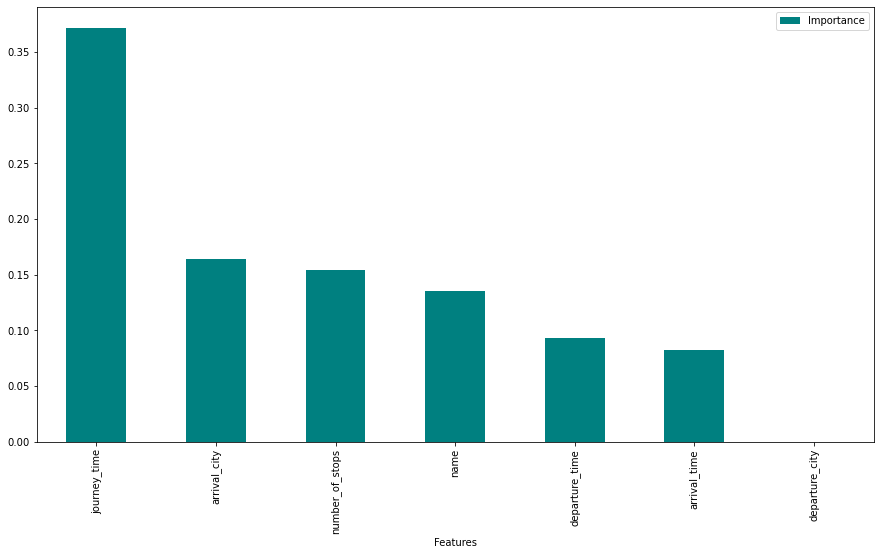

In [55]:
rf=RandomForestRegressor()
rf.fit(X_train, Y_train)
importances = pd.DataFrame({'Features':X.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
plt.rcParams["figure.figsize"] = (15,8)
importances.plot.bar(color='teal')
importances

# Machine Learning Model for Regression with Evaluation Metrics

In [56]:
# Regression Model Function

def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=638)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

In [57]:
# Linear Regression Model

model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 1623.4968691281247
R2 Score is: 40.23785866235098
Cross Validation Score: 42.06098514157602
R2 Score - Cross Validation Score is -1.8231264792250386


In [58]:
# Ridge Regularization

model=Ridge(alpha=1e-2, normalize=True)
reg(model, X, Y)

RMSE Score is: 1622.0443573184218
R2 Score is: 40.34474693078812
Cross Validation Score: 42.11252697017341
R2 Score - Cross Validation Score is -1.7677800393852934


In [59]:
# Lasso Regularization

model=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
reg(model, X, Y)

RMSE Score is: 1623.3883343473824
R2 Score is: 40.24584888914906
Cross Validation Score: 42.06370909192742
R2 Score - Cross Validation Score is -1.8178602027783626


In [60]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 1614.658457733153
R2 Score is: 40.886784593447295
Cross Validation Score: 31.607360775956124
R2 Score - Cross Validation Score is 9.279423817491171


In [61]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, Y)

RMSE Score is: 1813.6628265278662
R2 Score is: 25.417602024776585
Cross Validation Score: -13.970231192678135
R2 Score - Cross Validation Score is 39.38783321745472


In [62]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 1631.1959601654867
R2 Score is: 39.6696959850477
Cross Validation Score: 24.177630407370145
R2 Score - Cross Validation Score is 15.492065577677558


In [63]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE Score is: 1648.7782698326782
R2 Score is: 38.362111991128685
Cross Validation Score: 23.338768219269863
R2 Score - Cross Validation Score is 15.023343771858823


In [64]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score is: 1714.7493061602734
R2 Score is: 33.3309124927287
Cross Validation Score: 1.5310021155481834
R2 Score - Cross Validation Score is 31.799910377180517


In [65]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE Score is: 1602.5989178804589
R2 Score is: 41.766495105646925
Cross Validation Score: 17.422471240544017
R2 Score - Cross Validation Score is 24.34402386510291


In [66]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE Score is: 1143.8981060279552
R2 Score is: 70.33134070775829
Cross Validation Score: 44.292400658999185
R2 Score - Cross Validation Score is 26.038940048759102


# Hyper parameter tuning

In [67]:
# Choosing Extra Trees Regressor

fmod_param = {'n_estimators' : [100, 200, 300],
              'criterion' : ['squared_error', 'mse', 'absolute_error', 'mae'],
              'n_jobs' : [-2, -1, 1],
              'random_state' : [42, 251, 340]
             }

GSCV = GridSearchCV(ExtraTreesRegressor(), fmod_param, cv=5)
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'mse', 'absolute_error',
                                       'mae'],
                         'n_estimators': [100, 200, 300], 'n_jobs': [-2, -1, 1],
                         'random_state': [42, 251, 340]})

In [68]:
GSCV.best_params_

{'criterion': 'mae', 'n_estimators': 200, 'n_jobs': -2, 'random_state': 251}

In [69]:
Final_Model = ExtraTreesRegressor(criterion='mae', n_estimators=300, n_jobs=-2, random_state=251)
Model_Training = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred, multioutput='variance_weighted')*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 71.81802743705863


# Prediction of Flight Prices

In [74]:
Predicted_Price = Final_Model.predict(X)
# Checking the predicted price details in dataframe format
predicted_output = pd.DataFrame()
predicted_output['Flight Price Predicted'] = Predicted_Price
predicted_output['Flight Price Actual'] = df["price"]
predicted_output

,Flight Price Predicted,Flight Price Actual
0,4799.000000,4799.0
1,4799.000000,4799.0
2,4800.753333,4799.0
3,4800.753333,4799.0
4,4799.000000,4799.0
...,...,...
1551,14253.000000,14253.0
1552,14253.000000,14253.0
1553,14253.000000,14253.0
1554,14253.000000,14253.0


# Saving the best model

In [75]:
filename = "FlightPricePrediction.pkl"
joblib.dump(Final_Model, filename)

['FlightPricePrediction.pkl']